In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [2]:
data = pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"Y", "v2":"X"})

In [4]:
message = data['X'].copy()
check = data['Y'].copy()
data.head()
X = message.as_matrix()
Y=check.as_matrix()
print(Y)
X.shape

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


(5572,)

In [5]:
data['Y'].value_counts()

ham     4825
spam     747
Name: Y, dtype: int64

In [6]:
data['Y'] = data['Y'].map({'ham': 0, 'spam': 1})
data.head()

Y                                                  X
0  0  Go until jurong point, crazy.. Available only ...
1  0                      Ok lar... Joking wif u oni...
2  1  Free entry in 2 a wkly comp to win FA Cup fina...
3  0  U dun say so early hor... U c already then say...
4  0  Nah I don't think he goes to usf, he lives aro...

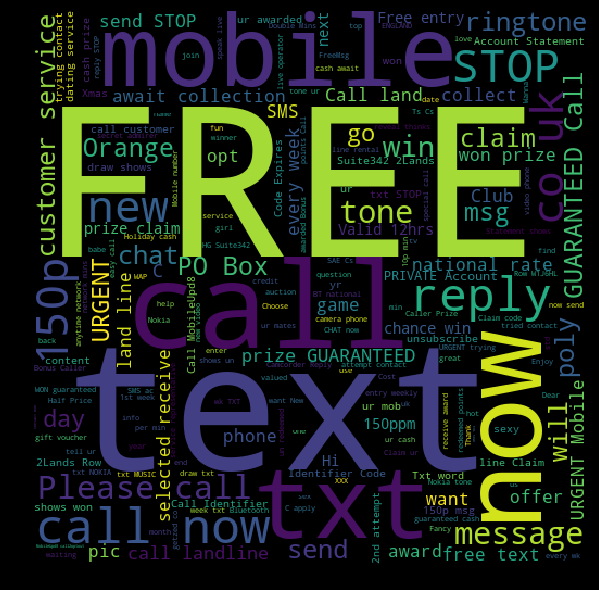

In [10]:
spam_words = ' '.join(list(data[data['Y'] == 1]['X']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [12]:
for i in range(0,5572):
    m=X[i];
    m=m.lower()
    m = word_tokenize(m)
    print(m)
type(m)

['go', 'until', 'jurong', 'point', ',', 'crazy..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']
['ok', 'lar', '...', 'joking', 'wif', 'u', 'oni', '...']
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005.', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', 't', '&', 'c', "'s", 'apply', '08452810075over18', "'s"]
['u', 'dun', 'say', 'so', 'early', 'hor', '...', 'u', 'c', 'already', 'then', 'say', '...']
['nah', 'i', 'do', "n't", 'think', 'he', 'goes', 'to', 'usf', ',', 'he', 'lives', 'around', 'here', 'though']
['freemsg', 'hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'i', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'tb', 'ok', '!', 'xxx', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'rcv']
['even', 

['i', 'jus', 'reached', 'home', '.', 'i', 'go', 'bathe', 'first', '.', 'but', 'my', 'sis', 'using', 'net', 'tell', 'u', 'when', 'she', 'finishes', 'k', '...']
['are', 'you', 'unique', 'enough', '?', 'find', 'out', 'from', '30th', 'august', '.', 'www.areyouunique.co.uk']
['i', "'m", 'sorry', '.', 'i', "'ve", 'joined', 'the', 'league', 'of', 'people', 'that', 'dont', 'keep', 'in', 'touch', '.', 'you', 'mean', 'a', 'great', 'deal', 'to', 'me', '.', 'you', 'have', 'been', 'a', 'friend', 'at', 'all', 'times', 'even', 'at', 'great', 'personal', 'cost', '.', 'do', 'have', 'a', 'great', 'week.|']
['hi', ':', ')', 'finally', 'i', 'completed', 'the', 'course', ':', ')']
['it', 'will', 'stop', 'on', 'itself', '.', 'i', 'however', 'suggest', 'she', 'stays', 'with', 'someone', 'that', 'will', 'be', 'able', 'to', 'give', 'ors', 'for', 'every', 'stool', '.']
['how', 'are', 'you', 'doing', '?', 'hope', 'you', "'ve", 'settled', 'in', 'for', 'the', 'new', 'school', 'year', '.', 'just', 'wishin', 'you', 

['todays', 'vodafone', 'numbers', 'ending', 'with', '0089', '(', 'my', 'last', 'four', 'digits', ')', 'are', 'selected', 'to', 'received', 'a', 'å£350', 'award', '.', 'if', 'your', 'number', 'matches', 'please', 'call', '09063442151', 'to', 'claim', 'your', 'å£350', 'award']
['free', 'top', 'ringtone', '-sub', 'to', 'weekly', 'ringtone-get', '1st', 'week', 'free-send', 'subpoly', 'to', '81618-', '?', '3', 'per', 'week-stop', 'sms-08718727870']
['nan', 'sonathaya', 'soladha', '.', 'why', 'boss', '?']
['bring', 'tat', 'cd', 'don', 'forget']
['sunshine', 'quiz', 'wkly', 'q', '!', 'win', 'a', 'top', 'sony', 'dvd', 'player', 'if', 'u', 'know', 'which', 'country', 'the', 'algarve', 'is', 'in', '?', 'txt', 'ansr', 'to', '82277.', 'å£1.50', 'sp', ':', 'tyrone']
['i', 'do', "n't", 'know', 'but', 'i', "'m", 'raping', 'dudes', 'at', 'poker']
['weightloss', '!', 'no', 'more', 'girl', 'friends', '.', 'make', 'loads', 'of', 'money', 'on', 'ebay', 'or', 'something', '.', 'and', 'give', 'thanks', 'to'

['k', '...', 'k', '...', 'yesterday', 'i', 'was', 'in', 'cbe', '.']
['went', 'to', 'ganesh', 'dress', 'shop']
['pdate_now', '-', 'double', 'mins', 'and', '1000', 'txts', 'on', 'orange', 'tariffs', '.', 'latest', 'motorola', ',', 'sonyericsson', '&', 'nokia', '&', 'bluetooth', 'free', '!', 'call', 'mobileupd8', 'on', '08000839402', 'or', 'call2optout/', '!', 'yhl']
['ìï', 'collecting', 'ur', 'laptop', 'then', 'going', 'to', 'configure', 'da', 'settings', 'izzit', '?']
['if', 'you', 'r', '@', 'home', 'then', 'come', 'down', 'within', '5', 'min']
['aight', ',', 'i', 'should', 'be', 'there', 'by', '8', 'at', 'the', 'latest', ',', 'probably', 'closer', 'to', '7.', 'are', 'jay', 'and', 'tyler', 'down', 'or', 'should', 'we', 'just', 'do', 'two', 'trips', '?']
['come', 'aftr', '&', 'lt', ';', 'decimal', '&', 'gt', ';', '..now', 'i', 'm', 'cleaning', 'the', 'house']
['ur', 'cash-balance', 'is', 'currently', '500', 'pounds', '-', 'to', 'maximize', 'ur', 'cash-in', 'now', 'send', 'cash', 'to', '8

['(', 'bank', 'of', 'granite', 'issues', 'strong-buy', ')', 'explosive', 'pick', 'for', 'our', 'members', '*****up', 'over', '300', '%', '***********', 'nasdaq', 'symbol', 'cdgt', 'that', 'is', 'a', '$', '5.00', 'per..']
['i', 'am', 'on', 'the', 'way', 'to', 'ur', 'home']
['dizzamn', ',', 'aight', 'i', "'ll", 'ask', 'my', 'suitemates', 'when', 'i', 'get', 'back']
['nimbomsons', '.', 'yep', 'phone', 'knows', 'that', 'one', '.', 'obviously', ',', 'cos', 'thats', 'a', 'real', 'word']
['i', 'love', 'to', 'cuddle', '!', 'i', 'want', 'to', 'hold', 'you', 'in', 'my', 'strong', 'arms', 'right', 'now', '...']
['r', 'u', 'in', 'this', 'continent', '?']
['we', "'ll", 'you', 'pay', 'over', 'like', '&', 'lt', ';', '#', '&', 'gt', ';', 'yrs', 'so', 'its', 'not', 'too', 'difficult']
['bored', 'housewives', '!', 'chat', 'n', 'date', 'now', '!', '0871750.77.11', '!', 'bt-national', 'rate', '10p/min', 'only', 'from', 'landlines', '!']
['we', 'tried', 'to', 'call', 'you', 're', 'your', 'reply', 'to', 'ou

['ok.', ',', 'is', 'any', 'problem', 'to', 'u', 'frm', 'him', '?', 'wats', 'matter', '?']
['k', 'i', "'ll", 'head', 'out', 'in', 'a', 'few', 'mins', ',', 'see', 'you', 'there']
['do', 'u', 'konw', 'waht', 'is', 'rael', 'friendship', 'im', 'gving', 'yuo', 'an', 'exmpel', ':', 'jsut', 'ese', 'tihs', 'msg..', 'evrey', 'splleing', 'of', 'tihs', 'msg', 'is', 'wrnog..', 'bt', 'sitll', 'yuo', 'can', 'raed', 'it', 'wihtuot', 'ayn', 'mitsake..', 'goodnight', '&', 'amp', ';', 'have', 'a', 'nice', 'sleep..sweet', 'dreams..']
['i', 'cant', 'pick', 'the', 'phone', 'right', 'now', '.', 'pls', 'send', 'a', 'message']
['i', 'do', "n't", 'want', 'you', 'to', 'leave', '.', 'but', 'i', "'m", 'barely', 'doing', 'what', 'i', 'can', 'to', 'stay', 'sane', '.', 'fighting', 'with', 'you', 'constantly', 'is', "n't", 'helping', '.']
['the', 'current', 'leading', 'bid', 'is', '151.', 'to', 'pause', 'this', 'auction', 'send', 'out', '.', 'customer', 'care', ':', '08718726270']
['free', 'entry', 'to', 'the', 'gr8pr

list